In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# fix shift

def muon_LDF(N, r, r0 = 0):

    return 18 * (N/(10**6 * (r-r0)))**0.75 * (1 + (r-r0)/320)**(-2.5)

def EM_LDF(N, r, r_m = 100, r0 = 0):

    return 0.4*N/r_m**2 * (r_m/(r-r0))**0.75 * (r_m / (r_m + (r-r0)))**3.25 * (1 + (r-r0)/(11.4 * r_m))

([<matplotlib.axis.XTick at 0x7f244c99bb80>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

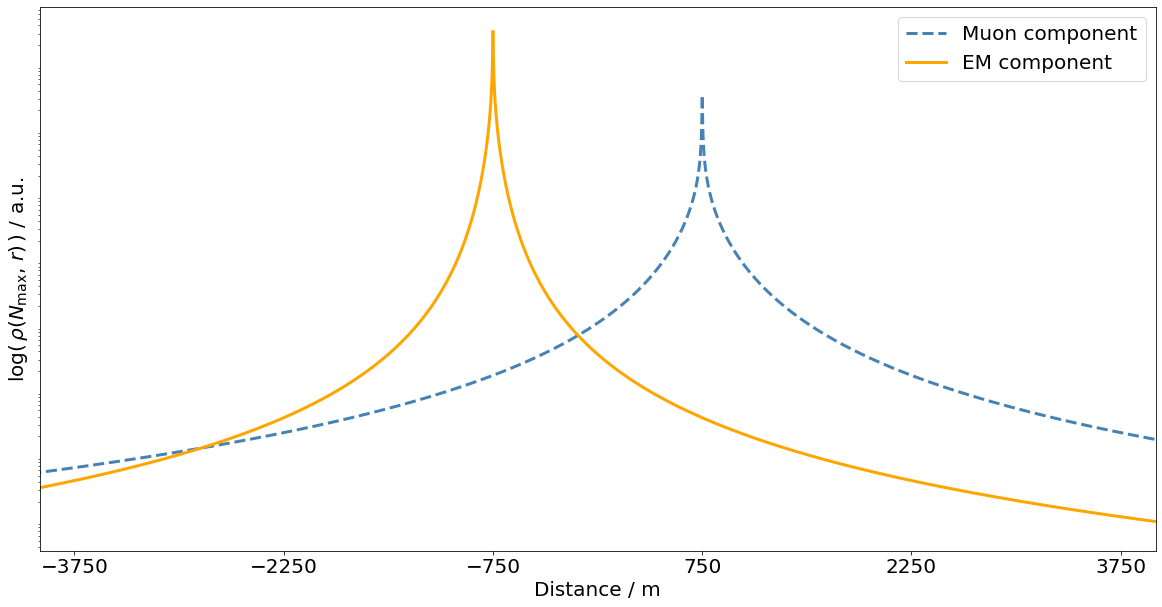

In [27]:
r_vals = np.geomspace(1, 5e3, 1000)

plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["font.size"] = 20

N_pi = 15         # multiplicity of Pions per step
E_c_had = 20e9    # critical pion energy in air in eV
E_c_el = 85e6     # critical energy for electrons in ar in eV

for E0 in [1e11]:


    n_had, n_el = 1, 0 

    while E0 > E_c_had:

        E0 /= N_pi

        n_el += 2 * (1/3 * n_had) * (np.floor( E0/2 / E_c_el ))
        n_had *= 2/3 * N_pi

    plt.plot(r_vals + 750, muon_LDF(n_had, r_vals, 0), label ="Muon component", ls = "--", lw = 3, c = "steelblue")
    plt.plot(-r_vals + 750, muon_LDF(n_had, r_vals, 0), ls = "--", lw = 3, c = "steelblue")

    plt.plot(r_vals - 750, EM_LDF(n_el, r_vals, 100, 0), label ="EM component", lw  = 3, c = "orange")
    plt.plot(-r_vals - 750, EM_LDF(n_el, r_vals, 100, 0), lw  = 3, c = "orange")

plt.ylabel(r"log$(\,\rho(N_\mathrm{max},\,r)\,$) / a.u.")
plt.xlabel(r"Distance / m")
plt.xlim(-4e3, 4e3)
plt.yscale("log")
plt.legend()
plt.yticks([])
plt.xticks([-3750, -2250, -750, 750, 2250, 3750])

In [24]:
plt.rcParams["figure.figsize"] = [40, 20]
plt.rcParams["font.size"] = 40